<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [3]:
df['Industry'] = df['Industry'].fillna('Unknown')  # استبدال القيم الفارغة

In [4]:
industry_counts = df['Industry'].value_counts()
print(industry_counts.head(10))  # عرض أعلى 10 صناعات فقط


Industry
Unknown                                       36579
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Name: count, dtype: int64


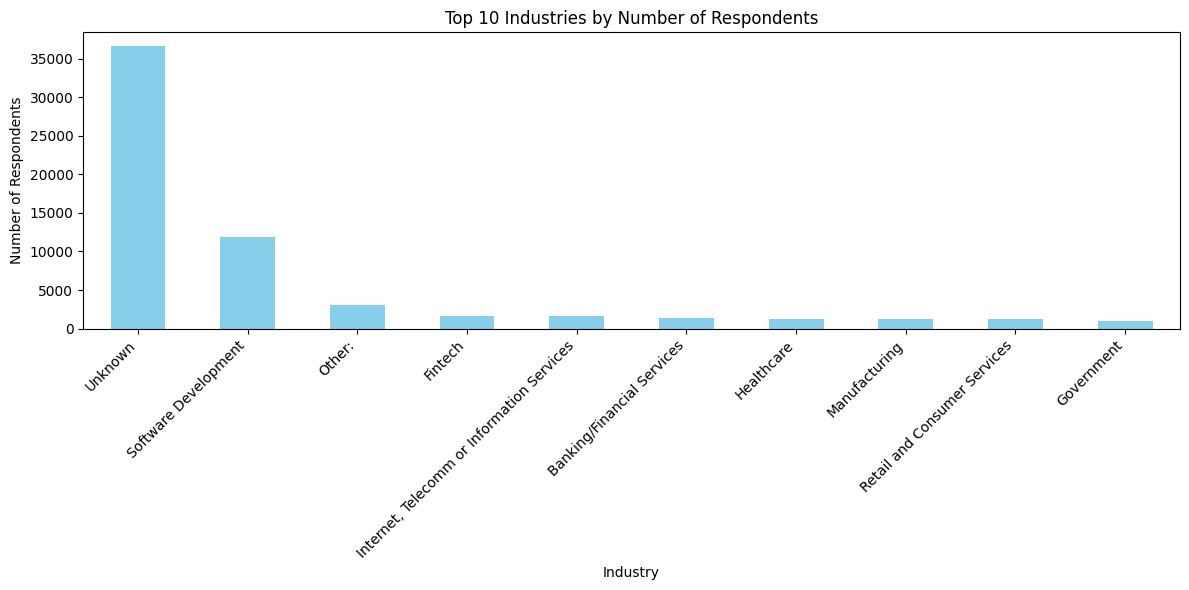

In [5]:
top10_industries = industry_counts.head(10)

plt.figure(figsize=(12,6))
top10_industries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Industries by Number of Respondents")
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
df['ConvertedCompYearly'].isnull().sum()

np.int64(42002)

In [7]:
df_clean = df[['ConvertedCompYearly']].dropna()

In [8]:
mean_comp = df_clean['ConvertedCompYearly'].mean()
median_comp = df_clean['ConvertedCompYearly'].median()
std_comp = df_clean['ConvertedCompYearly'].std()

print(f"Mean: {mean_comp}")
print(f"Median: {median_comp}")
print(f"Standard Deviation: {std_comp}")


Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.9730862951


In [9]:
threshold = mean_comp + 3 * std_comp

high_comp_outliers = df_clean[df_clean['ConvertedCompYearly'] > threshold]

print(f"Number of high compensation outliers: {len(high_comp_outliers)}")
print(high_comp_outliers.head())


Number of high compensation outliers: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [10]:
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)  # الربع الأول
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)  # الربع الثالث
IQR = Q3 - Q1

# تحديد الحدود
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Q1: 32712.0, Q3: 107971.5, IQR: 75259.5
Lower bound: -80177.25, Upper bound: 220860.75


In [11]:
outliers = df_clean[(df_clean['ConvertedCompYearly'] < lower_bound) |
                    (df_clean['ConvertedCompYearly'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers.head())


Number of outliers: 978
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


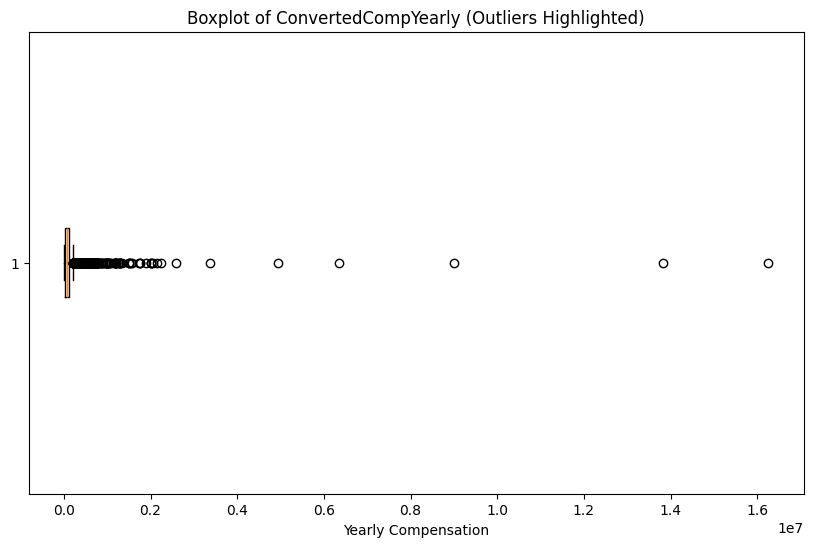

In [12]:
plt.figure(figsize=(10,6))
plt.boxplot(df_clean['ConvertedCompYearly'], vert=False)
plt.title("Boxplot of ConvertedCompYearly (Outliers Highlighted)")
plt.xlabel("Yearly Compensation")
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [13]:

# إنشاء نسخة جديدة بدون القيم الشاذة
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) &
                    (df['ConvertedCompYearly'] <= upper_bound)].copy()


In [14]:
print(f"Original DataFrame size: {df.shape[0]}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape[0]}")
print(f"Number of removed outliers: {df.shape[0] - df_no_outliers.shape[0]}")


Original DataFrame size: 65437
New DataFrame size (without outliers): 22457
Number of removed outliers: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [15]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

Age_num                1.000000
WorkExp                0.852538
ConvertedCompYearly    0.120809
JobSat                 0.069917
CompTotal             -0.002829
JobSatPoints_1        -0.028206
ResponseId            -0.037624
JobSatPoints_8        -0.046057
JobSatPoints_6        -0.050517
JobSatPoints_4        -0.075838
JobSatPoints_9        -0.081523
JobSatPoints_7        -0.082166
JobSatPoints_5        -0.101414
JobSatPoints_11       -0.107043
JobSatPoints_10       -0.114106
Name: Age_num, dtype: float64


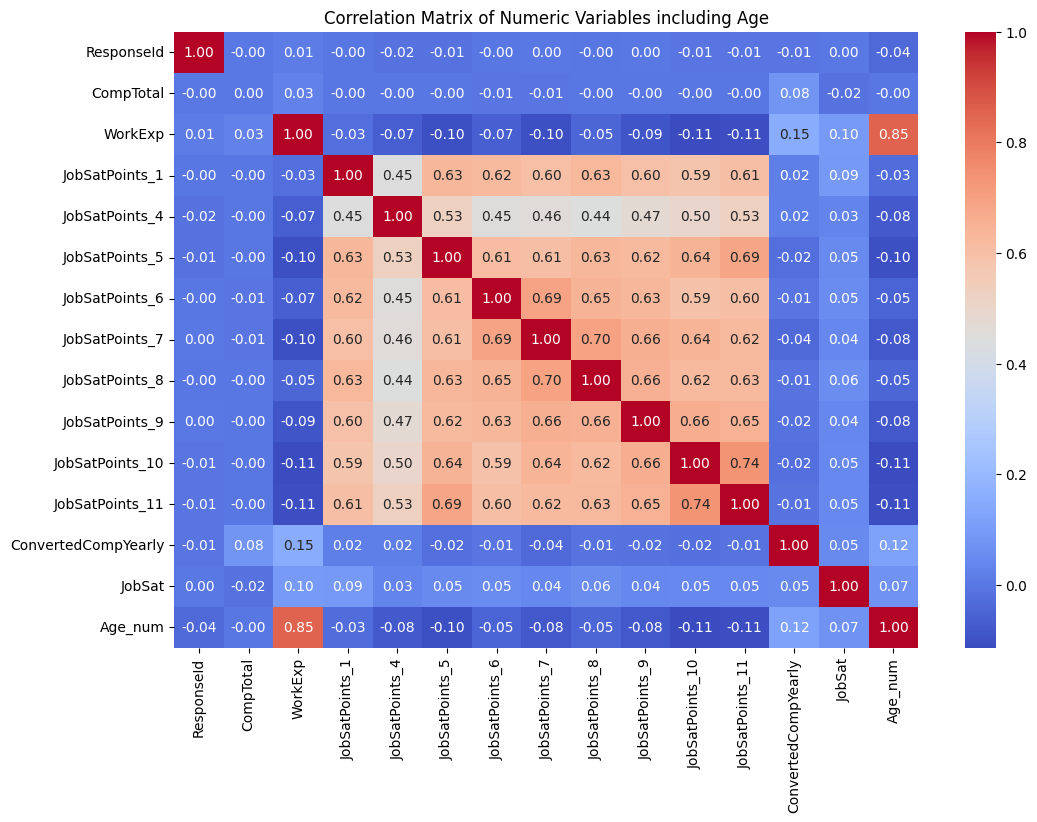

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ تحويل الأعمار إلى قيم رقمية إذا لم يتم ذلك مسبقًا
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
    "NA": np.nan
}

df['Age_num'] = df['Age'].map(age_mapping)

# 2️⃣ تحديد الأعمدة الرقمية
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Age_num' not in numeric_cols:
    numeric_cols.append('Age_num')

# 3️⃣ حساب مصفوفة الارتباط
correlation_matrix = df[numeric_cols].corr()

# 4️⃣ عرض correlation مع العمر
age_corr = correlation_matrix['Age_num'].sort_values(ascending=False)
print(age_corr)

# 5️⃣ رسم Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Variables including Age")
plt.show()


In [17]:

# التحقق من عدد القيم الفارغة لكل عمود
df['Age_num'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Age_num
Non-Null Count  Dtype  
--------------  -----  
65115 non-null  float64
dtypes: float64(1)
memory usage: 511.4 KB


Copyright © IBM Corporation. All rights reserved.
